In [274]:
import numpy as np
from random import randint
from sklearn.preprocessing import MinMaxScaler
import random

#PREPROCESS TEST DATA

In [275]:
train_labels = []
train_samples = []

In [276]:
for i in range(1000):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)
for i in range(50):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

In [277]:
# we must have to randomize the list to get uniform distribution
d=list(zip(train_samples,train_labels))
random.shuffle(d)

In [278]:
train_labels=[]
train_samples=[]
for i,j in d:
    train_samples.append(i)
    train_labels.append(j)   
    

In [279]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)

In [280]:
scaler = MinMaxScaler(feature_range=(0,1))
print(np.shape(train_samples))
# we have to reshape bcoz fit_transform doesn't takes 1-d array as argument,it's just technical formality
scaled_train_samples = scaler.fit_transform((train_samples).reshape(-1,1))
# scaled_train_samples=scaled_train_samples.reshape(2100,),we may or may not need this line
for i in scaled_train_samples:
    print(i)

(2100,)
[0.85057471]
[0.79310345]
[0.06896552]
[0.70114943]
[0.44827586]
[0.67816092]
[0.65517241]
[0.25287356]
[0.74712644]
[0.25287356]
[0.85057471]
[0.11494253]
[0.2183908]
[0.67816092]
[0.16091954]
[0.64367816]
[0.01149425]
[0.36781609]
[0.68965517]
[0.71264368]
[0.35632184]
[0.26436782]
[0.25287356]
[0.51724138]
[0.89655172]
[0.95402299]
[0.83908046]
[0.44827586]
[0.09195402]
[0.72413793]
[0.06896552]
[0.98850575]
[0.81609195]
[0.1954023]
[0.01149425]
[0.57471264]
[0.33333333]
[0.79310345]
[0.16091954]
[0.16091954]
[0.43678161]
[0.43678161]
[0.20689655]
[0.3908046]
[0.88505747]
[0.64367816]
[0.40229885]
[0.32183908]
[0.14942529]
[0.33333333]
[0.25287356]
[0.51724138]
[0.77011494]
[0.16091954]
[0.97701149]
[0.59770115]
[0.96551724]
[0.36781609]
[0.14942529]
[0.49425287]
[0.57471264]
[0.03448276]
[0.09195402]
[0.83908046]
[0.79310345]
[0.97701149]
[0.67816092]
[0.62068966]
[0.74712644]
[0.40229885]
[0.63218391]
[0.25287356]
[0.44827586]
[0.42528736]
[0.90804598]
[0.97701149]
[0.0689

#creating artificial neural net

In [281]:
import keras
from keras import backend as k
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

In [282]:
model=Sequential([
    Dense(16, input_shape=(1,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [283]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_35 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_36 (Dense)             (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [284]:
model.compile(Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#training artificial neural net

In [285]:
model.fit(scaled_train_samples, train_labels, validation_split=0.1, batch_size=10, epochs=20, shuffle=True, verbose=2)

Train on 1890 samples, validate on 210 samples
Epoch 1/20
 - 0s - loss: 0.6859 - accuracy: 0.5704 - val_loss: 0.6669 - val_accuracy: 0.6000
Epoch 2/20
 - 0s - loss: 0.6575 - accuracy: 0.5894 - val_loss: 0.6391 - val_accuracy: 0.6429
Epoch 3/20
 - 0s - loss: 0.6343 - accuracy: 0.6286 - val_loss: 0.6148 - val_accuracy: 0.6619
Epoch 4/20
 - 0s - loss: 0.6118 - accuracy: 0.6683 - val_loss: 0.5889 - val_accuracy: 0.7000
Epoch 5/20
 - 0s - loss: 0.5873 - accuracy: 0.7132 - val_loss: 0.5627 - val_accuracy: 0.7524
Epoch 6/20
 - 0s - loss: 0.5615 - accuracy: 0.7450 - val_loss: 0.5360 - val_accuracy: 0.7714
Epoch 7/20
 - 0s - loss: 0.5364 - accuracy: 0.7804 - val_loss: 0.5099 - val_accuracy: 0.7952
Epoch 8/20
 - 0s - loss: 0.5121 - accuracy: 0.8005 - val_loss: 0.4846 - val_accuracy: 0.8143
Epoch 9/20
 - 0s - loss: 0.4884 - accuracy: 0.8206 - val_loss: 0.4599 - val_accuracy: 0.8476
Epoch 10/20
 - 0s - loss: 0.4660 - accuracy: 0.8349 - val_loss: 0.4367 - val_accuracy: 0.8571
Epoch 11/20
 - 0s - lo

##validation set = some % of training set,on which we validate

In [286]:
print(type(scaled_train_samples))

<class 'numpy.ndarray'>


#PREDICTION

In [287]:
##Preprocess Test Data

In [288]:
test_samples = []
test_labels = []

In [289]:
for i in range(10):
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)
for i in range(200):
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)   

#test_samples = []
#for i in range(50):
    #test_samples.append(randint(13,100))

In [290]:
test_samples = np.array(test_samples)
test_labels  = np.array(test_labels)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_test_samples = scaler.fit_transform((test_samples).reshape(-1,1))

#PREDICTIONS

In [291]:
predictions = model.predict(scaled_test_samples, batch_size=10, verbose=0)

In [292]:
c = np.hstack((test_samples.reshape(-1,1),predictions))

In [293]:
#for i in c:
#    print(i)
rounded_predictions = model.predict_classes(scaled_test_samples, batch_size=10, verbose=0)
d=np.hstack((test_samples.reshape(-1,1),rounded_predictions.reshape(-1,1)))
e=np.hstack((test_labels.reshape(-1,1),rounded_predictions.reshape(-1,1)))
for i in d:
    print(i)
print(test_labels)
print(rounded_predictions)
for i in e:
    print(i)

[26  0]
[94  1]
[38  0]
[85  1]
[55  0]
[95  1]
[29  0]
[72  1]
[54  0]
[99  1]
[19  0]
[89  1]
[45  0]
[91  1]
[18  0]
[65  1]
[19  0]
[65  1]
[51  0]
[71  1]
[39  0]
[74  1]
[52  0]
[66  1]
[27  0]
[87  1]
[43  0]
[74  1]
[44  0]
[89  1]
[54  0]
[94  1]
[54  0]
[75  1]
[42  0]
[77  1]
[57  0]
[84  1]
[60  0]
[80  1]
[20  0]
[89  1]
[63  1]
[68  1]
[13  0]
[75  1]
[23  0]
[94  1]
[13  0]
[88  1]
[40  0]
[100   1]
[64  1]
[99  1]
[19  0]
[70  1]
[42  0]
[95  1]
[61  0]
[87  1]
[59  0]
[90  1]
[40  0]
[88  1]
[35  0]
[85  1]
[13  0]
[92  1]
[55  0]
[70  1]
[58  0]
[100   1]
[37  0]
[76  1]
[33  0]
[98  1]
[14  0]
[92  1]
[13  0]
[93  1]
[31  0]
[65  1]
[56  0]
[80  1]
[15  0]
[72  1]
[29  0]
[69  1]
[19  0]
[71  1]
[61  0]
[99  1]
[46  0]
[70  1]
[14  0]
[67  1]
[30  0]
[76  1]
[33  0]
[81  1]
[22  0]
[66  1]
[56  0]
[78  1]
[44  0]
[90  1]
[16  0]
[85  1]
[47  0]
[95  1]
[21  0]
[98  1]
[48  0]
[77  1]
[15  0]
[83  1]
[52  0]
[96  1]
[50  0]
[74  1]
[54  0]
[68  1]
[37  0]
[66  1]
[32 

In [294]:
#CREATING CONFUSION MARIRIX

In [295]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

cm = confusion_matrix(test_labels, rounded_predictions)
def plot_confusion_matrix(cm,classes,normalize=False,
                          title='confusion_matrix',cmap=plt.cm.Blues):
    plt.imshow(cm,interpolation='nearest',cmap= cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print('Normalized Confusion Matrix')
    else:
        print('confusion  matrix without normalization')
    print(cm)
    
    thresh = cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                 horizontalalignment='center',
                 color='white' if cm[i,j]>thresh else "black")
    plt.tight_layout()
    plt.ylabel('true label')
    plt.xlabel('predicted label')

confusion  matrix without normalization
[[189  21]
 [ 10 200]]


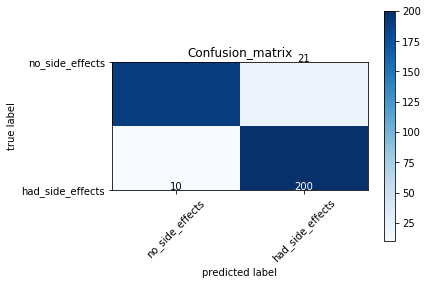

In [296]:
cm_plot_labels = ['no_side_effects', 'had_side_effects']
plot_confusion_matrix(cm,cm_plot_labels,title='Confusion_matrix')

## Saving model

In [297]:
model.save('medical_trial_model.h5')

### Saving model architecture only,by using
### model.to_json()

In [298]:
# save as json
json_string = model.to_json()
json_string

from keras.models import model_from_json
model_architecture = model_from_json(json_string)

In [299]:
model_architecture.summary()

yaml_string = model.to_yaml()
from keras.models import model_from_yaml
model_architecture1 = model_from_yaml(yaml_string)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_35 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_36 (Dense)             (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [300]:
model_architecture1.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_35 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_36 (Dense)             (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


## Saving model weights

In [301]:
model.save_weights('my_model_weights.h5')